<a href="https://colab.research.google.com/github/arpit4101/Machine-Learning-Concepts/blob/main/K-Nearest%20Neighbour%20(KNN)/KNN_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/glass.csv')
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
print(X.shape)
print(y.shape)

(214, 9)
(214,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [6]:
print(X_train.shape)
print(X_test.shape)

(171, 9)
(43, 9)


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
columns = X_train.columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train,y_train)
X_test = sc.transform(X_test)

In [8]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def KnearNeigh(X_train, y_train, k):

  kn = KNeighborsClassifier(n_neighbors=k)
  kn.fit(X_train,y_train)
  y_pred1 = kn.predict(X_test)

  return accuracy_score(y_test, y_pred1)

k = int(np.sqrt(X_train.shape[0]))
k_arr = []
acc_score = []

for i in range(1,k+1):
  k_arr.append(i)
  acc_score.append(KnearNeigh(X_train,y_train,i))

Text(0.5, 1.0, 'Accuracy Score corresponding to each K-value')

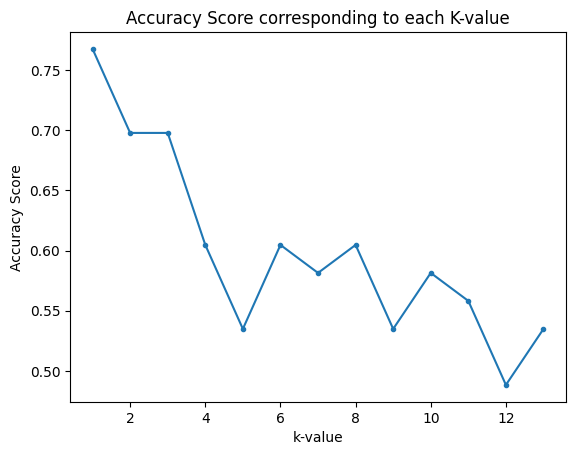

In [14]:
plt.plot(k_arr, acc_score, marker='.')
plt.xlabel('k-value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score corresponding to each K-value')

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# knn = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'brute', p=2, metric='minkowski', n_jobs =-1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test)
print('accuracy score : ', accuracy_score(y_test, y_pred))

accuracy score :  0.7674418604651163
